<a href="https://colab.research.google.com/github/YuliyaMatiyuk/2_1_-_-/blob/main/Kopie_von_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%964_Pandas_%2B_SQL-09.06.2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [59]:
!pip install mysql-connector-python

In [60]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

In [61]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [62]:
import pandas as pd

In [63]:
sql = """
SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS num_employees
FROM employees
GROUP BY hire_year;
"""


In [64]:
df = pd.read_sql(sql,con)

In [65]:
import warnings

warnings.filterwarnings('ignore')

In [66]:
df = pd.read_sql(sql, con)

In [67]:
df

,hire_year,num_employees
0,1986,36150
1,1985,35316
2,1989,28394
3,1994,14835
4,1990,25610
5,1992,20402
6,1987,33501
7,1995,12115
8,1993,17772
9,1999,1514


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
sql = """
SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS num_employees
FROM employees
GROUP BY hire_year
ORDER BY hire_year;
"""

In [70]:
df = pd.read_sql(sql, con)

In [71]:
df.columns = ['hire_year', 'emp_num']

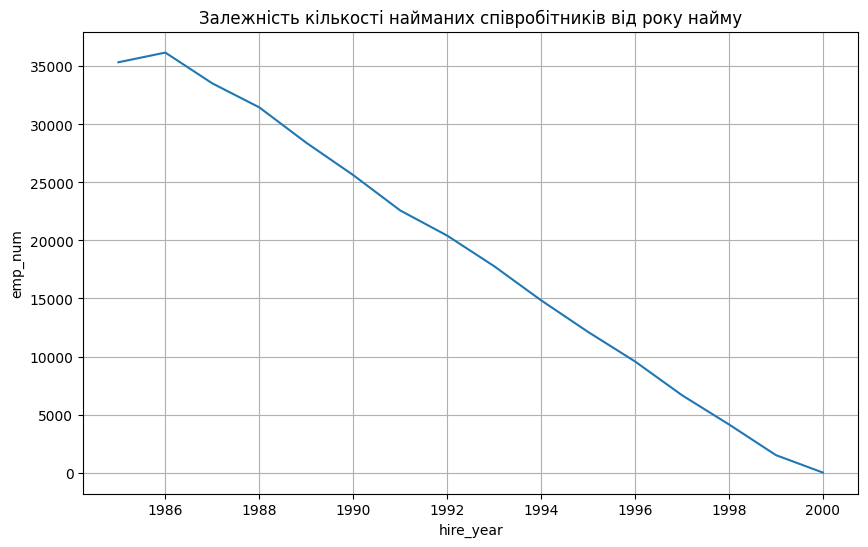

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(df['hire_year'], df['emp_num'], linestyle='-')
plt.title('Залежність кількості найманих співробітників від року найму')
plt.xlabel('hire_year')
plt.ylabel('emp_num')
plt.grid(True)

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [73]:
import pandas as pd

In [117]:
sql_query = """
SELECT emp.emp_no, titles.title, titles.from_date, titles.to_date,
       TIMESTAMPDIFF(YEAR, titles.from_date, STR_TO_DATE(titles.to_date, '%Y-%m-%d')) AS duration
FROM employees emp
JOIN titles ON emp.emp_no = titles.emp_no
WHERE titles.title = 'Engineer'
AND to_date!= '9999-01-01'
GROUP BY emp_no, from_date, to_date;
"""


In [118]:
df_years = pd.read_sql_query(sql_query, con)

In [119]:
df_years

,emp_no,title,from_date,to_date,duration
0,10004,Engineer,1986-12-01,1995-12-01,9
1,10009,Engineer,1990-02-18,1995-02-18,5
2,10012,Engineer,1992-12-18,2000-12-18,8
3,10018,Engineer,1987-04-03,1995-04-03,8
4,10026,Engineer,1995-03-20,2001-03-19,5
...,...,...,...,...,...
84015,499972,Engineer,1989-11-23,1998-11-23,9
84016,499984,Engineer,1989-07-30,1994-07-30,5
84017,499994,Engineer,1993-02-22,1993-10-27,0
84018,499996,Engineer,1996-05-13,2002-05-13,6


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

In [120]:
import matplotlib.pyplot as plt


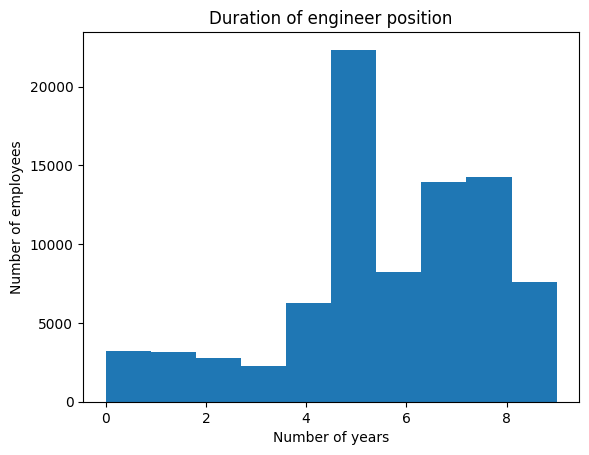

In [121]:
plt.hist (df_years ['duration'])
plt.title ('Duration of engineer position')
plt.xlabel ('Number of years')
plt.ylabel ('Number of employees')
plt.show ()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [122]:
con.close()